# MBA FIAP Inteligência Artificial & Machine Learning


## Tecnologia de Processamento de Imagens

O seguinte projeto foi desenvolvido como atividade substitutiva para a disciplina Teccnologia de Processamento de Imagens, como condição para abonar o excedente de faltas na disciplina.

**Autor:** Ewerton Carlos de Araujo Assis, RM 330737

## Introdução

Diferentes abordagens para trabalhar com reconhecimento facial estão disponíveis a partir de métodos desenvolvidos em visão computacional e inteligência computacional. O presente projeto tem por finalidade realizar um comparativo entre os três principais métodos utilizados e disponibilizados na biblioteca OpenCV: *Eigenfaces*, *Fisherfaces* e *Local Binary Patterns Histograms*.

## 0. Definições iniciais

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
from scipy.spatial import distance as dist
import collections
from matplotlib.pyplot import figure

%matplotlib inline

# Função de suporte para exibição de imagens no Jupyter
def exibir_imagem(imagem):
    figure(num=None, figsize=(15, 10))
    image_plt = mpimg.imread(imagem)
    plt.imshow(image_plt)
    plt.axis('off')
    plt.show()

ROOT_PATH = os.path.abspath('../')
face_classifier = cv2.CascadeClassifier(
    os.path.join(
        ROOT_PATH, 'classifiers', 'haarcascade_frontalface_default.xml'))

if not os.path.exists(os.path.join(ROOT_PATH, 'evidence')):
    os.makedirs(os.path.join(ROOT_PATH, 'evidence'))
if not os.path.exists(os.path.join(ROOT_PATH, 'evidence', 'eigen')):
    os.makedirs(os.path.join(ROOT_PATH, 'evidence', 'eigen'))
if not os.path.exists(os.path.join(ROOT_PATH, 'evidence', 'fisher')):
    os.makedirs(os.path.join(ROOT_PATH, 'evidence', 'fisher'))
if not os.path.exists(os.path.join(ROOT_PATH, 'evidence', 'lbph')):
    os.makedirs(os.path.join(ROOT_PATH, 'evidence', 'lbph'))

def face_extractor(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.2, 5)
    if faces is ():
        return None
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]
    return cropped_face


## 1. *Eigenfaces*

A seguir estão disponibilizados quatro blocos de código que realizam os seguintes processos: (1) é feita a captura de imagens que irão compor a base de dados do problema; (2) é feito o treinamento da base de dados, a partir do algoritmo selecionado (neste caso, o *Eigenfaces*); (3) é feita busca de uma face na base de dados, através de uma nova captura; e (4), por fim, é feita a apresentação da imagem que foi captura e encontrada na base de dados (reconhecimento facial realizado).

In [2]:
# Código para captura de imagem com a câmera padrão
cap = cv2.VideoCapture(0)
counter = 0
counter_max = 50
filepath = os.path.abspath('../evidence/eigen')

while True:
    ret, frame = cap.read()
    if ret:
        cv2.imshow("Imagem de Treino", frame)
        if face_extractor(frame) is not None:
            counter += 1
            face = cv2.resize(face_extractor(frame), (200, 200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            full_filename = os.path.join(filepath, "candidate-{0:03d}.jpg".format(counter))
            cv2.imwrite(full_filename, face)
            # cv2.putText(face, str(counter), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
            # cv2.imshow('Face {0:03d}'.format(counter), face)
        if counter == counter_max:
            break

cv2.waitKey(0)
cv2.destroyAllWindows()
cap.release()
print("Coleta de amostras completada")

Coleta de amostras completada


In [2]:
data_path = "../evidence/eigen"

onlyfiles = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f)) and f.startswith('candidate')]
onlyfiles.sort()
training_data, labels = [], []

for i, _file in enumerate(onlyfiles):
    image_path = os.path.join(os.path.abspath(data_path), _file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    training_data.append(image)
    labels.append(0)

labels = np.asarray(labels, dtype=np.int32)
model = cv2.face.EigenFaceRecognizer_create()
model.train(training_data, labels)

print("Modelo treinado com sucesso.")

persons = {0: 'Candidate'}

Modelo treinado com sucesso.


In [3]:
# Código para captura de imagem de entrada/busca
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.2, 5)
        if not len(faces):
            cv2.putText(frame, "Unrecognized", (60,60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
        for (x,y,w,h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cropped_face = frame[y:y+h, x:x+w]
            face = cv2.resize(cropped_face, (200, 200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            predictions = model.predict(face)
            cv2.putText(frame, "Distance {0}".format(predictions[1]), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
            if predictions[0] == 0:
                cv2.putText(frame, "Recognized {0}".format(persons[0]), (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)                
                EVIDENCE_FILENAME = "../evidence/eigen/matched.png"
                if not os.path.isfile(EVIDENCE_FILENAME):
                    cv2.imwrite(EVIDENCE_FILENAME, frame)
        cv2.imshow("Face recognition", frame)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

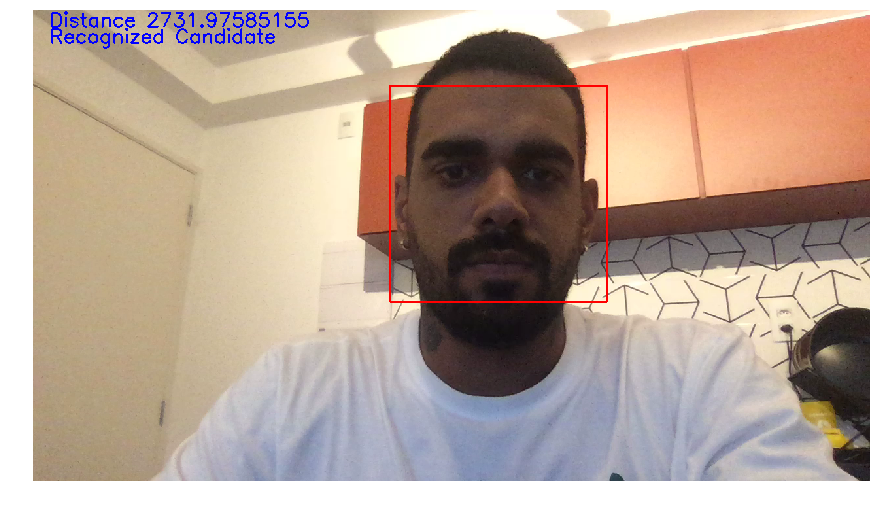

In [4]:
exibir_imagem("../evidence/eigen/matched.png")

## 2. Fisherfaces

A seguir estão disponibilizados quatro blocos de código que realizam os seguintes processos: (1) é feita a captura de imagens que irão compor a base de dados do problema; (2) é feito o treinamento da base de dados, a partir do algoritmo selecionado (neste caso, o *Fisherfaces*); (3) é feita busca de uma face na base de dados, através de uma nova captura; e (4), por fim, é feita a apresentação da imagem que foi captura e encontrada na base de dados (reconhecimento facial realizado).

In [2]:
# Código para captura de imagem com a câmera padrão
cap = cv2.VideoCapture(0)
counter = 0
counter_max = 50
filepath = os.path.abspath('../evidence/fisher')

while True:
    ret, frame = cap.read()

    if ret:
        cv2.imshow("Imagem de Treino", frame)
        if face_extractor(frame) is not None:
            counter += 1
            face = cv2.resize(face_extractor(frame), (200, 200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            full_filename = os.path.join(filepath, "candidate-{0:03d}.jpg".format(counter))
            cv2.imwrite(full_filename, face)
            cv2.putText(face, str(counter), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
            cv2.imshow('Face {0:03d}'.format(counter), face)
        
        # Se for teclado Enter (tecla 13) deverá sair do loop e encerrar a captura de imagem
        # ou for alcançado a contagem máxima (amostras)
        if cv2.waitKey(1) == 13 or counter == counter_max:
            break
        
cap.release()
cv2.destroyAllWindows()
print("Coleta de amostras completado")

Coleta de amostras completado


In [2]:
data_path = "../evidence/fisher"

onlyfiles = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f)) and f.startswith('candidate')]
onlyfiles.sort()
training_data, labels = [], []

for i, _file in enumerate(onlyfiles):
    image_path = os.path.join(os.path.abspath(data_path), _file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    training_data.append(image)
    labels.append(0 if i < 40 else 1)

labels = np.asarray(labels, dtype=np.int32)
model = cv2.face.FisherFaceRecognizer_create()
model.train(training_data, labels)

print("Modelo treinado com sucesso.")

persons = {0: 'Candidate', 1: 'Another'}

Modelo treinado com sucesso.


In [3]:
# Código para captura de imagem de entrada/busca
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.2, 5)
        if not len(faces):
            cv2.putText(frame, "Unrecognized", (60,60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
        for (x,y,w,h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cropped_face = frame[y:y+h, x:x+w]
            face = cv2.resize(cropped_face, (200, 200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            predictions = model.predict(face)
            cv2.putText(frame, "Distance {0}".format(predictions[1]), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
            if predictions[0] == 0:
                cv2.putText(frame, "Recognized {0}".format(persons[0]), (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)                
                EVIDENCE_FILENAME = "../evidence/fisher/matched.png"
                if not os.path.isfile(EVIDENCE_FILENAME):
                    cv2.imwrite(EVIDENCE_FILENAME, frame)
        cv2.imshow("Face recognition", frame)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

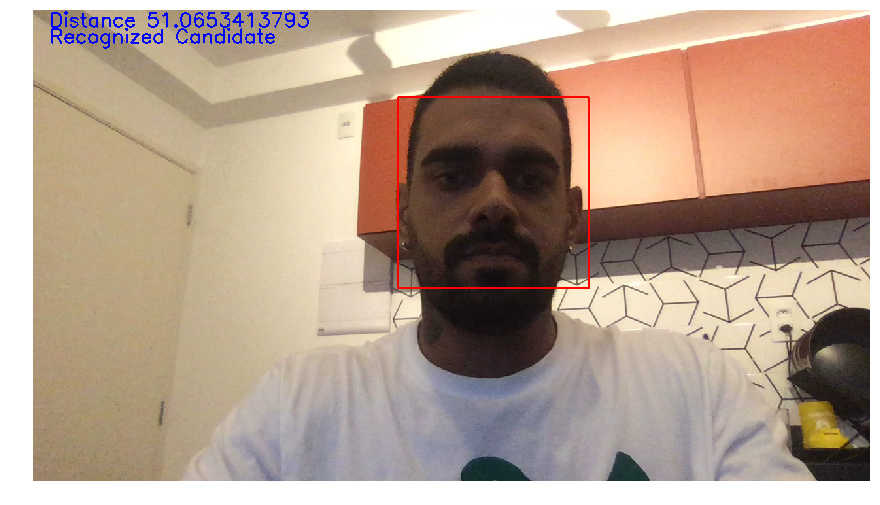

In [4]:
exibir_imagem("../evidence/fisher/matched.png")

## 3. Local Binary Patterns Histograms

A seguir estão disponibilizados quatro blocos de código que realizam os seguintes processos: (1) é feita a captura de imagens que irão compor a base de dados do problema; (2) é feito o treinamento da base de dados, a partir do algoritmo selecionado (neste caso, o *Local Binary Patterns Histograms*); (3) é feita busca de uma face na base de dados, através de uma nova captura; e (4), por fim, é feita a apresentação da imagem que foi captura e encontrada na base de dados (reconhecimento facial realizado).

In [2]:
# Código para captura de imagem com a câmera padrão
cap = cv2.VideoCapture(0)
counter = 0
counter_max = 50
filepath = os.path.abspath('../evidence/lbph')

while True:
    ret, frame = cap.read()
    if ret:
        cv2.imshow("Imagem de Treino", frame)
        if face_extractor(frame) is not None:
            counter += 1
            face = cv2.resize(face_extractor(frame), (200, 200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            full_filename = os.path.join(filepath, "candidate-{0:03d}.jpg".format(counter))
            cv2.imwrite(full_filename, face)
            # cv2.putText(face, str(counter), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
            # cv2.imshow('Face {0:03d}'.format(counter), face)
        if counter == counter_max:
            break
        
cv2.waitKey(0)
cv2.destroyAllWindows()
cap.release()
print("Coleta de amostras completada")

Coleta de amostras completada


In [2]:
data_path = "../evidence/lbph"

onlyfiles = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f)) and f.startswith('candidate')]
onlyfiles.sort()
training_data, labels = [], []

for i, _file in enumerate(onlyfiles):
    image_path = os.path.join(os.path.abspath(data_path), _file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    training_data.append(image)
    labels.append(0)

labels = np.asarray(labels, dtype=np.int32)
model = cv2.face.LBPHFaceRecognizer_create()
model.train(training_data, labels)

print("Modelo treinado com sucesso.")

persons = {0: 'Candidate'}

Modelo treinado com sucesso.


In [3]:
# Código para captura de imagem de entrada/busca
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if ret:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(frame_gray, 1.2, 5)
        if not len(faces):
            cv2.putText(frame, "Unrecognized", (60,60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
        for (x,y,w,h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            face = frame_gray[y:y + h, x:x + w]
            predictions = model.predict(face)
            cv2.putText(frame, "Distance {0}".format(predictions[1]), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
            if predictions[1] >= 30 and predictions[1] <= 40:
                cv2.putText(frame, "Recognized {0}".format(persons[0]), (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)                
                EVIDENCE_FILENAME = "../evidence/lbph/matched.png"
                if not os.path.isfile(EVIDENCE_FILENAME):
                    cv2.imwrite(EVIDENCE_FILENAME, frame)
        cv2.imshow("Face recognition", frame)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()

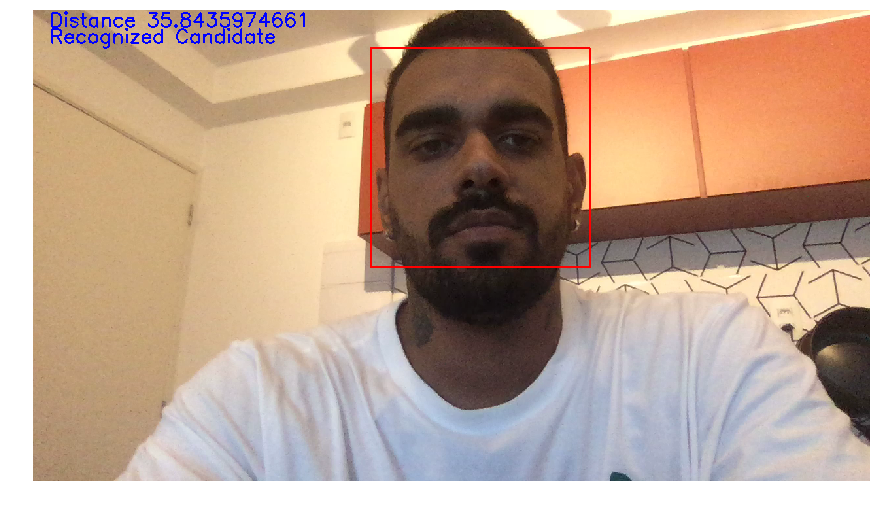

In [4]:
exibir_imagem("../evidence/lbph/matched.png")

## Conclusões

Os três experimentos puderam demonstrar como as técnicas *Eigenfaces*, *Fisherfaces* e *Local Binary Patterns Histograms* podem ser utilizadas para criar uma solução para reconhecimento facial, a partir de soluções disponibilizadas no OpenCV. Todas as técnicas foram capazes de realizar o reconhecimento facial de forma aceitável, com um ambiente de boa iluminação.